In [1]:
import requests,json,re
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

# 连接数据库
connect = pymysql.Connect(
    host='localhost',
    port=3306,
    user='root',
    passwd='haveagoodtime',
    db='spyder',
    charset='utf8'
)
cursor = connect.cursor()
cursor.execute('set NAMES utf8')
sql = "INSERT INTO commentDataHSX (pid, pname, comment, rate, ratertype) VALUES (%s,%s,%s,%s,%s)"


In [8]:
def getCommodityComments(pid,name,sid):
#     if url[url.find('id=')+14] != '&':
#         id = url[url.find('id=')+3:url.find('id=')+15]
#     else:
#         id = url[url.find('id=')+3:url.find('id=')+14]

    url = 'https://rate.tmall.com/list_detail_rate.htm?itemId='+pid+'&sellerid='+sid
#     print(url)
    res = requests.get(url)
    m_o=re.compile(r'\"rateList\":(\[.*?\])\,\"searchinfo\"')
    m_o2=re.compile(r'"total":(\d*),')
    li=m_o.findall(res.text)
    max=int(m_o2.findall(res.text)[0])
    data=pd.DataFrame(json.loads(li[0]))
    count = 0
    page = 2
    print('该商品共有评论'+str(max)+'条,具体如下: loading...')
    da=[]
    while count<max:
        res1 = requests.get(url+'&currentPageNum'+str(page))
        li1=m_o.findall(res1.text)    
        if len(li1)>0:
            d=pd.DataFrame(json.loads(li1[0]))
            data=pd.concat([data,d])
            count+=len(d)
            page = page + 1
    return data

def getPage(searchStr):
#     cursor.execute('select distinct pid from commentDataHSX')
#     a=cursor.fetchall()
#     b=[]
    df=pd.DataFrame()
#     for i in a:
#         b.append(i[0]) 
    for i in range(1):
        url=u'https://s.taobao.com/search?q='+searchStr+'&s='+str(44*i)        
        res = requests.get(url)
        match_str=r'"nid":"(.*?)".*?"raw_title":"(.*?)".*?"user_id":"(.*?)"'
        match_obj=re.compile(match_str)
        li=match_obj.findall(res.text)        
        for item in li:
#             if item[0] not in b:
            try:
#                 print(item[0],item[1],item[2])
                d=getCommodityComments(item[0],item[1],item[2])
                df.append(d)
            except IndexError:
                pass

    return df

In [9]:
d1=getPage('华为荣耀9')

551731783114 现货当天发 直降800 华为 荣耀 荣耀9 手机 270215026
https://rate.tmall.com/list_detail_rate.htm?itemId=551731783114&sellerid=270215026
该商品共有评论0条,具体如下: loading...
565517054327 [12期分期 0首付]华为/荣耀9青春版手机新品 2088045547
https://rate.tmall.com/list_detail_rate.htm?itemId=565517054327&sellerid=2088045547
该商品共有评论0条,具体如下: loading...
567332753408 新品首发华为荣耀10智能机官方旗舰正品手机 1114511827
https://rate.tmall.com/list_detail_rate.htm?itemId=567332753408&sellerid=1114511827
该商品共有评论0条,具体如下: loading...
552856496808 【领券低至1779】华为honor/荣耀 荣耀9全网通智能拍照手机正品 1114511827
https://rate.tmall.com/list_detail_rate.htm?itemId=552856496808&sellerid=1114511827
该商品共有评论0条,具体如下: loading...
552856804867 华为honor/荣耀 荣耀9全网通标配/尊享智能手机官方旗舰店正品 1114511827
https://rate.tmall.com/list_detail_rate.htm?itemId=552856804867&sellerid=1114511827
该商品共有评论0条,具体如下: loading...
563074125414 【低至1049元】华为honor/荣耀 荣耀9青春版全面屏手机官方旗舰店 1114511827
https://rate.tmall.com/list_detail_rate.htm?itemId=563074125414&sellerid=1114511827
该商品共有评论0条,具体如下: loading...
562948989464 

In [10]:
%%time
import re
url = 'https://rate.tmall.com/list_detail_rate.htm?itemId=567459918867&sellerid=263726286'
res = requests.get(url)
m_o=re.compile(r'\"rateList\":(\[.*?\])\,\"searchinfo\"')
m_o2=re.compile(r'"total":(\d*),')
li=m_o.findall(res.text)
max=int(m_o2.findall(res.text)[0])
data=pd.DataFrame(json.loads(li[0]))
count = 0
page = 2
print('该商品共有评论'+str(max)+'条,具体如下: loading...')
while count<max:
    res1 = requests.get(url+'&currentPageNum'+str(page))
    li1=m_o.findall(res1.text)    
    if len(li1)>0:
        d=pd.DataFrame(json.loads(li1[0]))
        data=pd.concat([data,d])
        count+=len(d)
        page = page + 1

该商品共有评论0条,具体如下: loading...
CPU times: user 68.7 ms, sys: 4.02 ms, total: 72.7 ms
Wall time: 616 ms


In [52]:
match_str=r'\[(.*)\]'
match_obj=re.compile(match_str)
li1=match_obj.findall(res.text)#nid

In [37]:
s1='select * from commentData1 order by length(comment) desc limit 10000'
cursor.execute('select * from commentData1 where pid=555880868836')
d1=pd.DataFrame(list(cursor.fetchall())).iloc[:,1:]
d1.columns=['pid','pname','comment','rate','ratertype']
d1

,pid,pname,comment,rate,ratertype
0,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,东东收到！包装专业完好。东东质量很好，包装和店铺的都一样一样滴！是良品铺子的正品。各种口味都...,1,0
1,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,一直都买良品铺子的零食，特别好吃，而且也喜欢积分兑换的礼物，都很好，也很实用，这个第一次吃，...,1,0
2,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,好吃！肉食动物的福星！别家都没得卖！鸡爪味道很好 牛舌是独立包装一片一片装的 挺厚的 耳片...,1,0
3,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,好品质，认准良品铺子法式香草味牛柳。半价抢了一份还没吃。日历很漂亮,1,0
4,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,之前买过来吃，挺喜欢的，牛肉味道不错，这次还送了一包利是封。,1,0
5,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,感谢这个图片很有食欲，不知道具体咋样，还没吃，的确比其他的牛肉制品贵，到良品的放心，应该不会...,1,0
6,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,口味还可以，在淘宝搞年货节的时候大采购的，价格都很实在，挺优惠的，买来有自己吃^_^，也有送...,1,0
7,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,&ldquo;好品质，认准黑椒牛柳&rdquo;半价买滴，满划算的呀，喜欢喜欢。物流超快的。,1,0
8,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,味道不错，下次还来，里面还有小包装,1,0
9,555880868836,良品铺子法式香草味牛柳黑椒牛肉干卤味即食香辣味休闲零食小吃,和之前买的一样好～味道也很好，关键聚划算没运费就很赞～还会光顾的～,1,0


In [81]:
from snownlp import SnowNLP
import re

match_str=r'(&.*?;)'
match_obj=re.compile(match_str)

def senti(text):
    text=match_obj.sub('',text)
    if len(text)>0:
        a=SnowNLP(text)
#         print('en',end='')
        return a.sentiments
    else:
        return -1
    
def sentis(a):
    return map(senti,a)

# d1['score']=d1['comment'].apply(senti)
# d1


In [34]:
d1.to_excel('sentiment.xls',encoding='utf-8')

In [12]:
cursor.execute('select * from commentData1')
d=pd.DataFrame(list(cursor.fetchall())).iloc[:,1:]
d.columns=['pid','pname','comment','rate','ratertype']
d['len']=d.comment.apply(len)

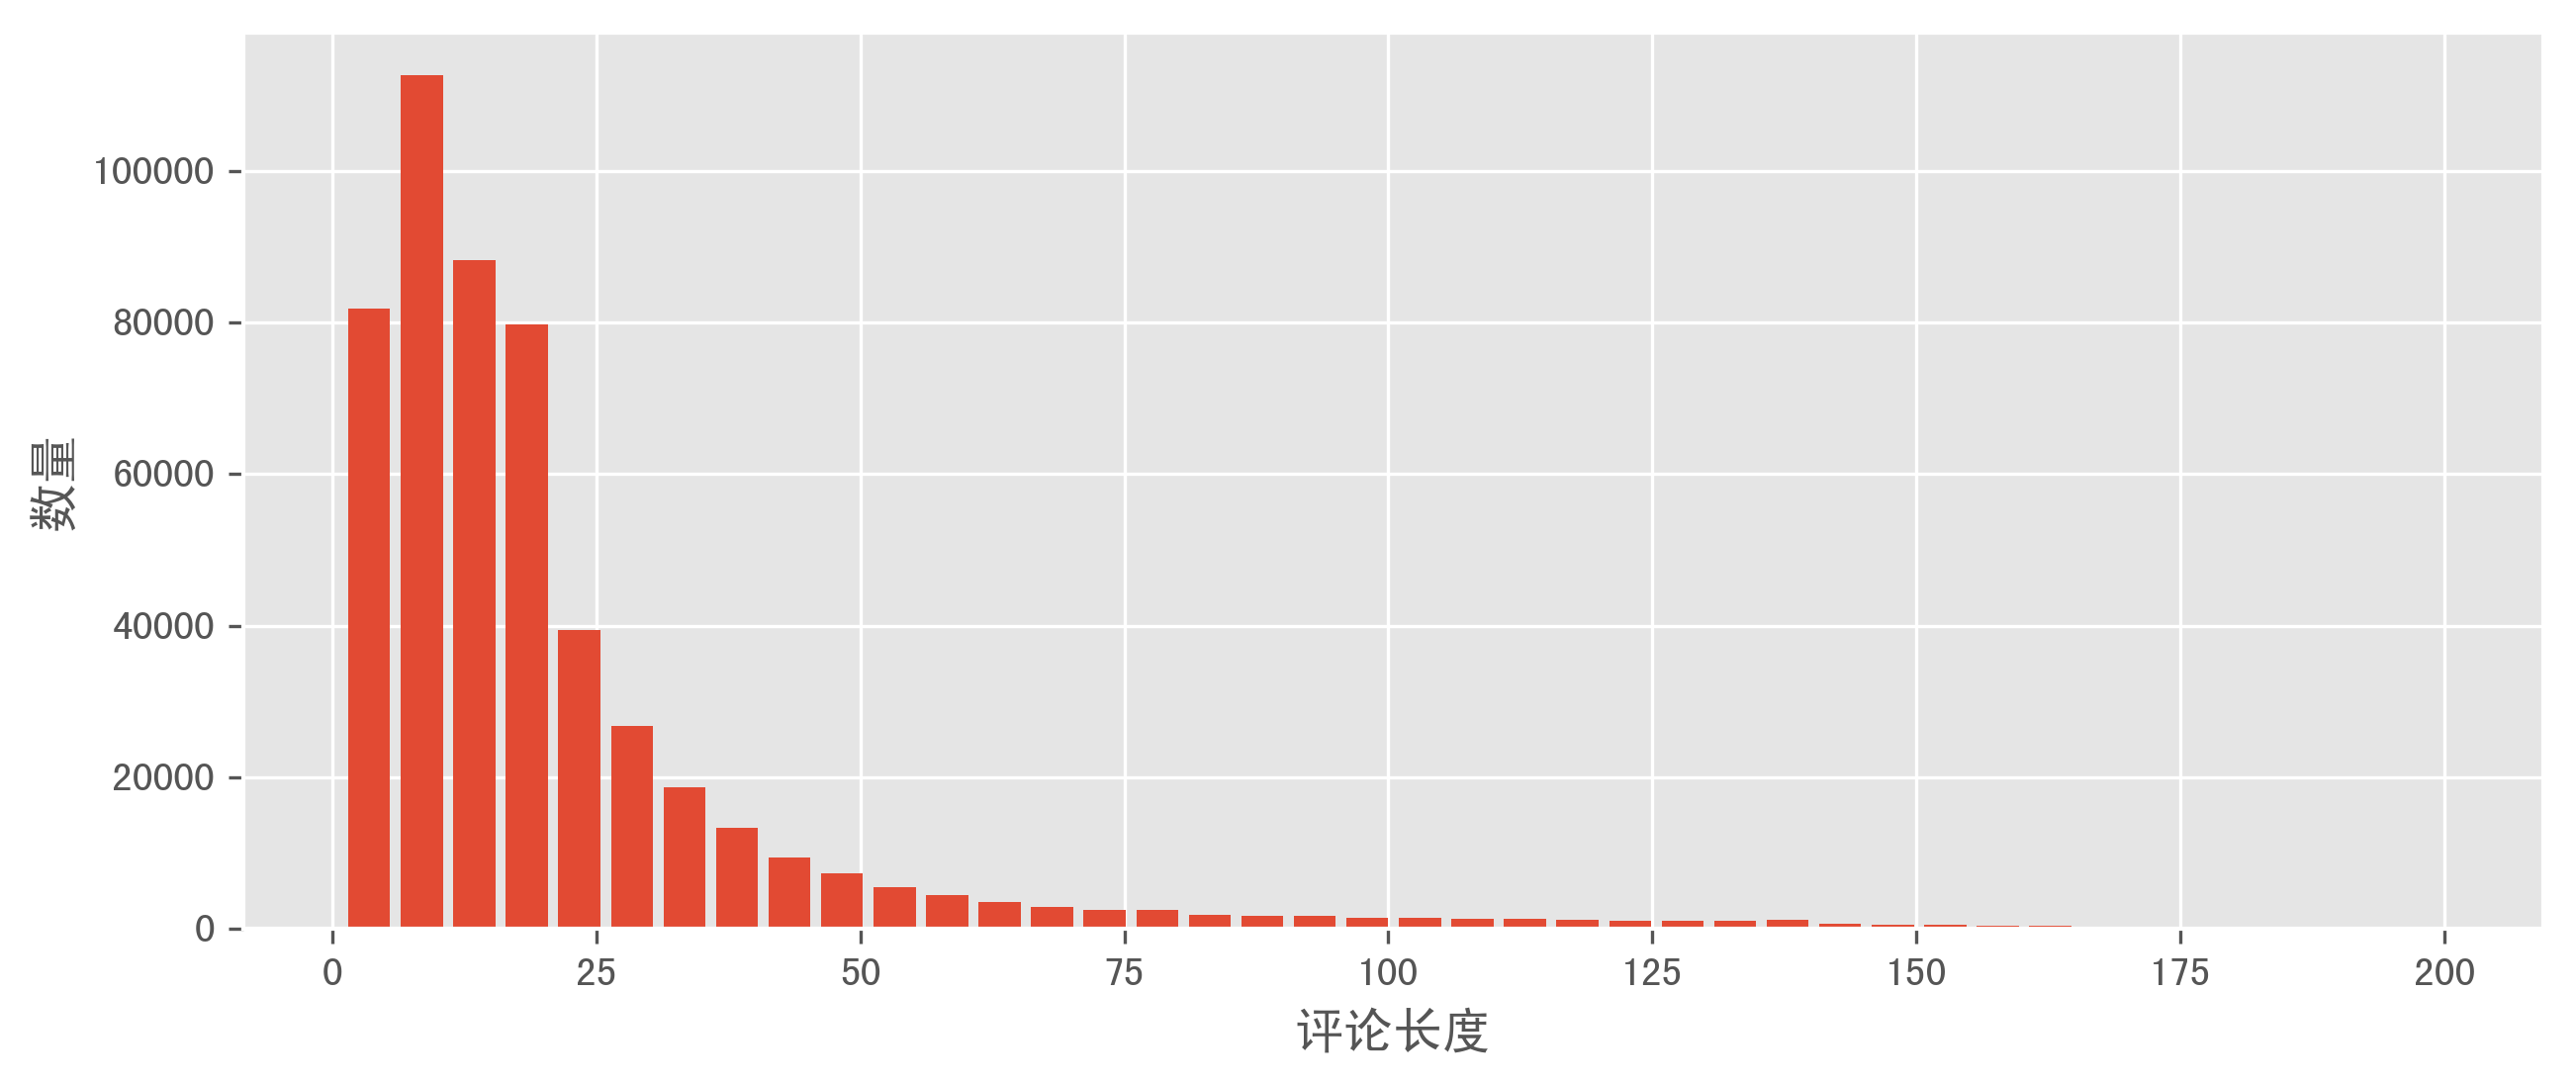

In [101]:
plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')
d1=pd.read_csv('sentiment.csv')
d.sort_values(by='len',ascending=True).groupby('len').count().iloc[:,0]
a=plt.hist(d[d.len<=200].len,rwidth=0.8,bins=40)
plt.xlabel('评论长度')
plt.ylabel('数量')

plt.show()

Text(0,0.5,'频率')

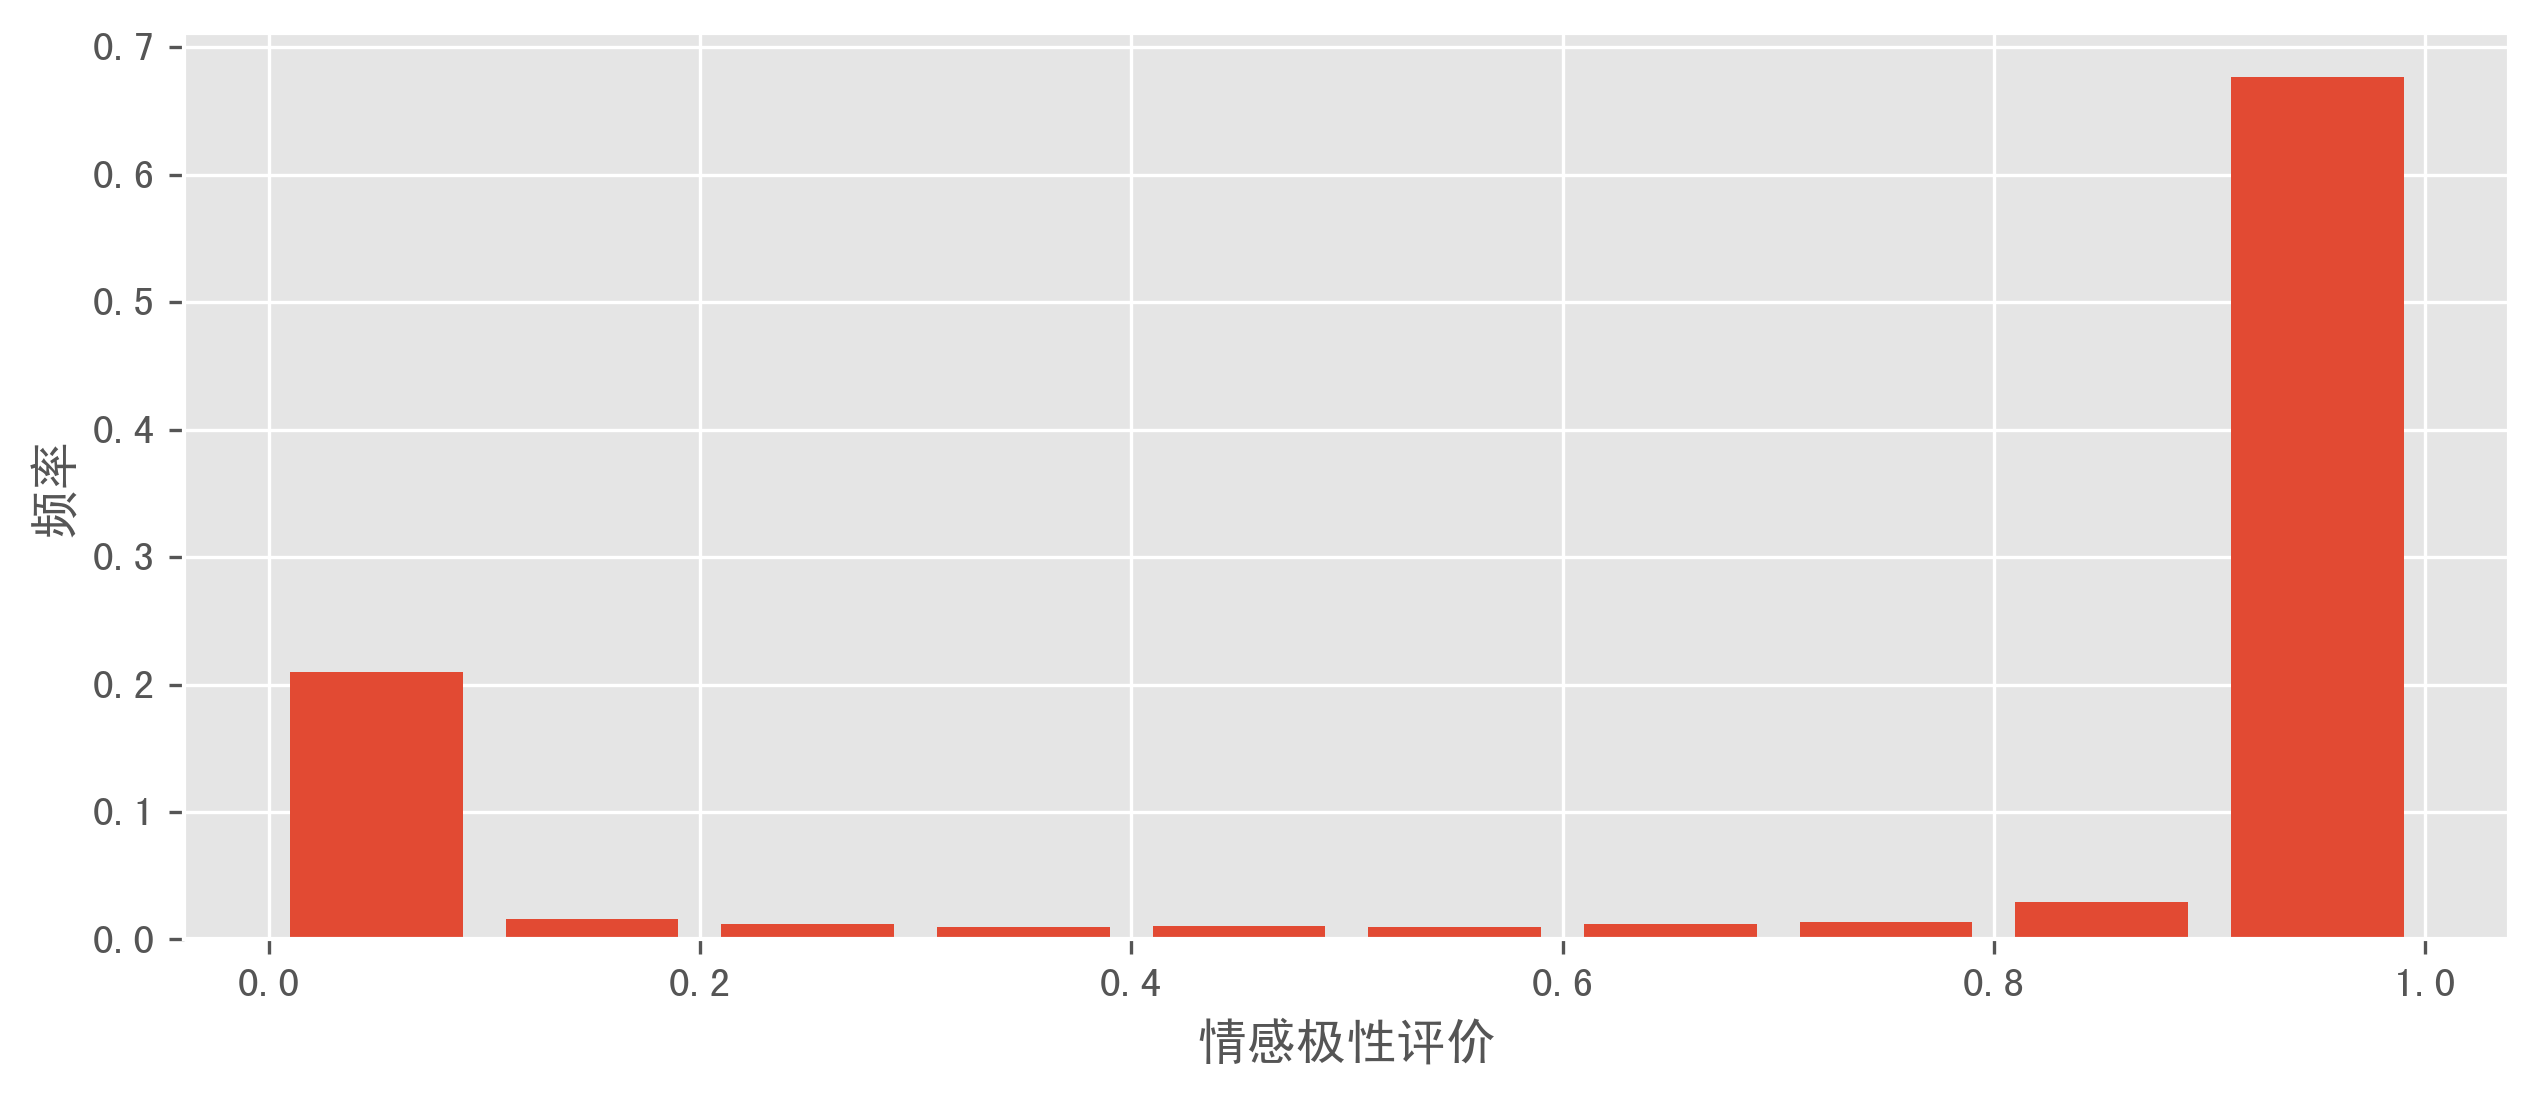

In [102]:
plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')

weights = np.ones_like(d1.score)/float(len(d1.score))
plt.hist(d1.score,10,weights=weights,cumulative=False,normed=0,rwidth=0.8)
plt.xlabel('情感极性评价')
plt.ylabel('频率')

Text(0,0.5,'频率')

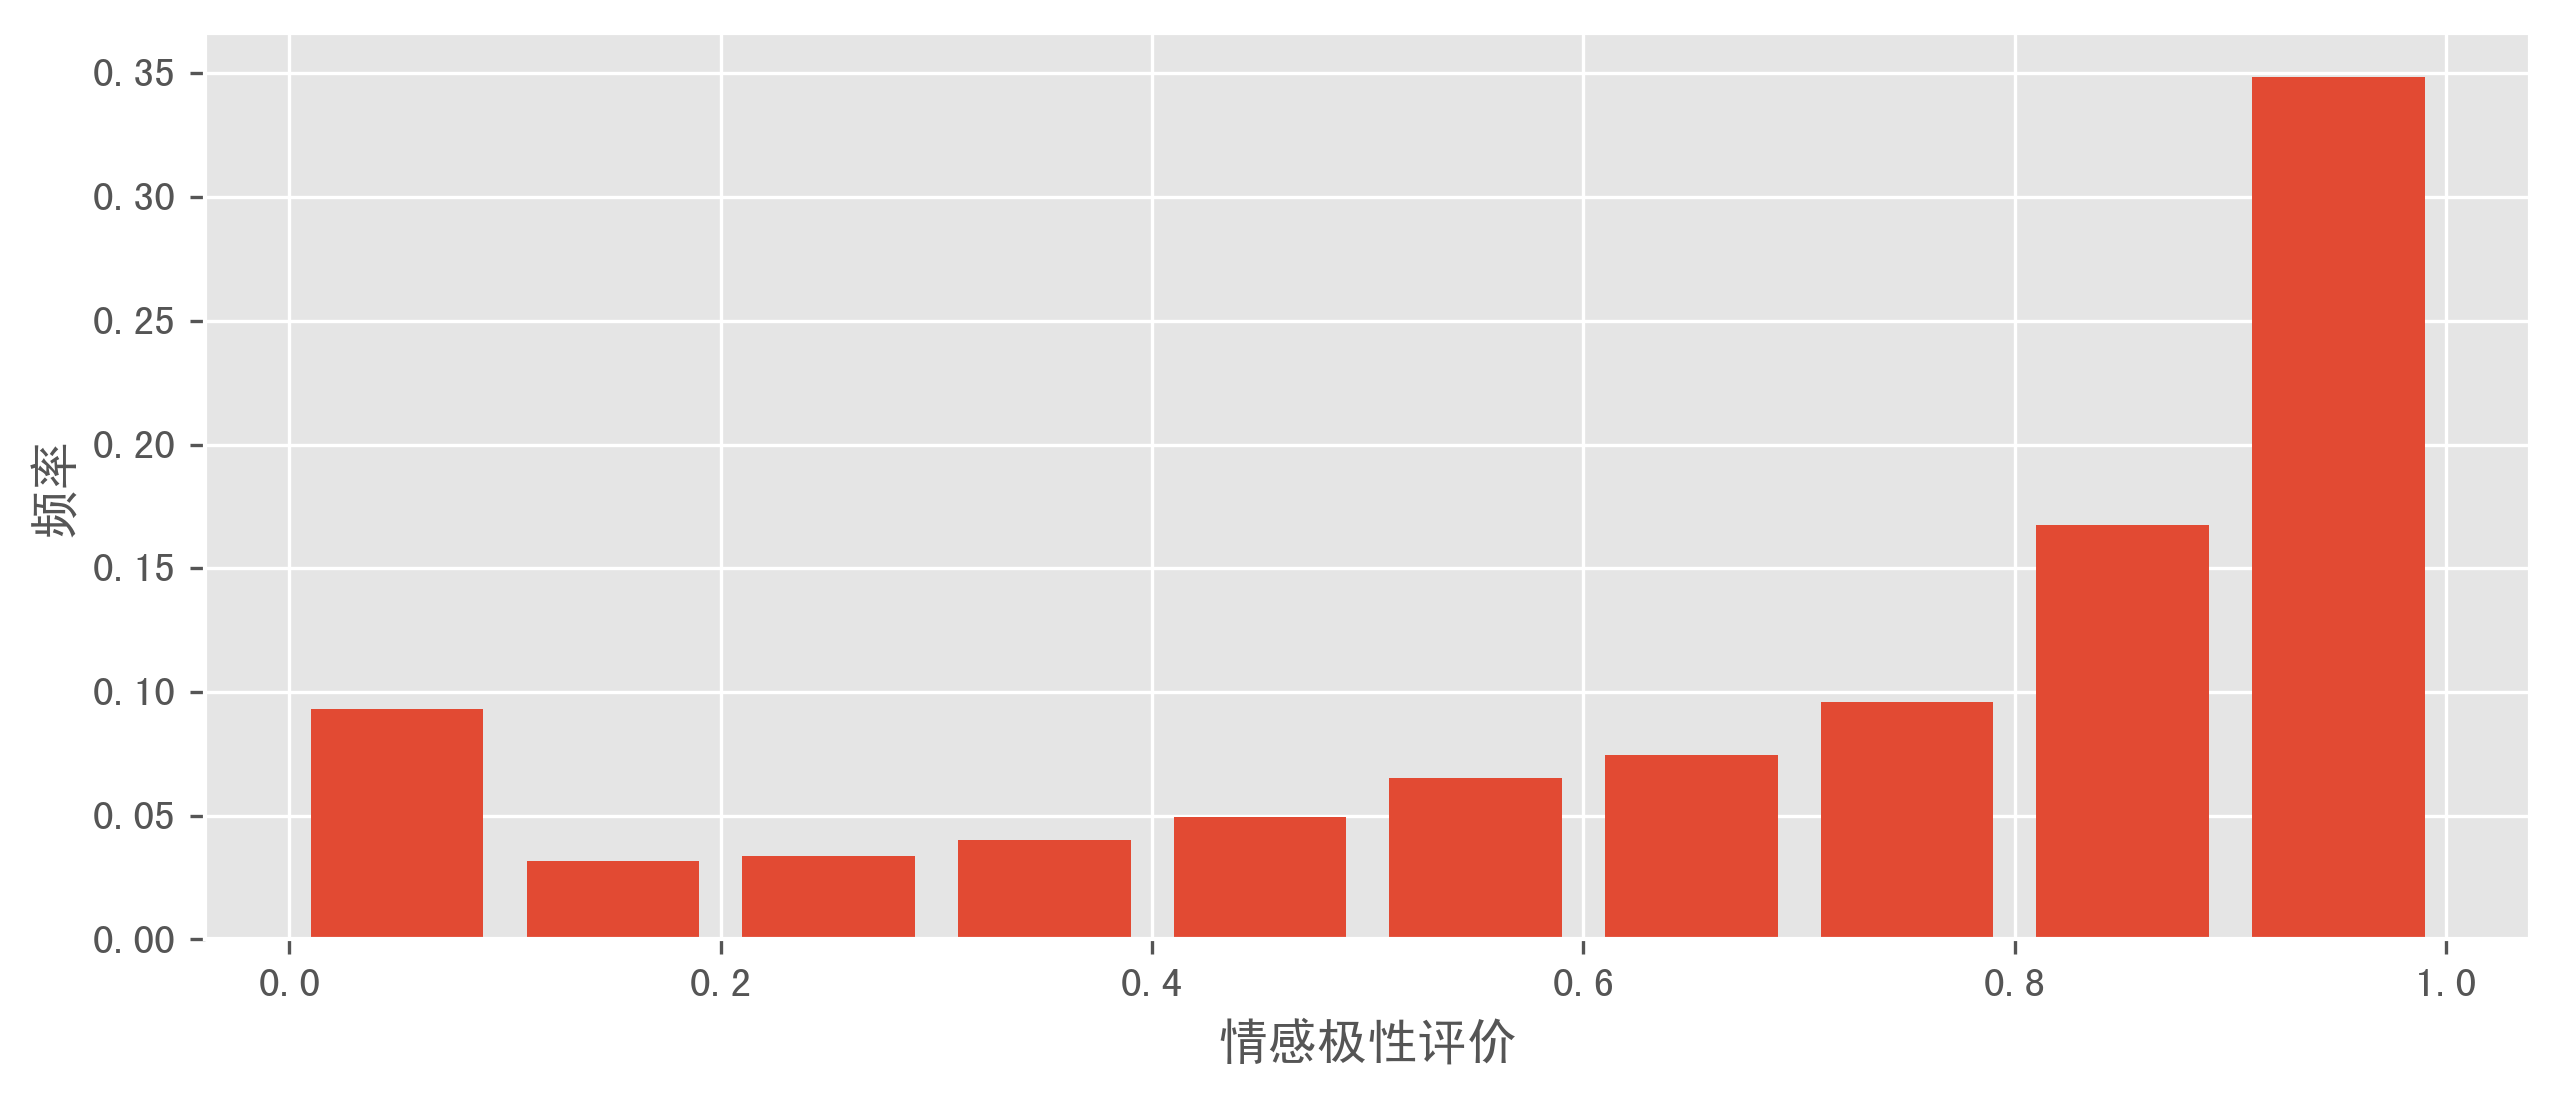

In [103]:
plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')

weights = np.ones_like(d3.score)/float(len(d3.score))
plt.hist(d3.score,10,weights=weights,cumulative=False,normed=0,rwidth=0.8)
plt.xlabel('情感极性评价')
plt.ylabel('频率')

In [83]:
d2=d[(d.len<=50)&(d.len>=5)]
d2['score']=d2.comment.apply(senti)


/Users/tianyizhuang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
d2.score

AttributeError: 'DataFrame' object has no attribute 'score'

In [72]:
a

(array([  81871.,  112533.,   88238.,   79695.,   39401.,   26753.,
          18717.,   13295.,    9482.,    7315.,    5533.,    4482.,
           3619.,    2900.,    2570.,    2454.,    1856.,    1757.,
           1690.,    1503.,    1459.,    1363.,    1282.,    1190.,
           1129.,    1026.,    1116.,    1193.,     702.,     543.,
            560.,     412.,     453.,     354.,     352.,     300.,
            264.,     224.,     183.,     182.]),
 array([   1.   ,    5.975,   10.95 ,   15.925,   20.9  ,   25.875,
          30.85 ,   35.825,   40.8  ,   45.775,   50.75 ,   55.725,
          60.7  ,   65.675,   70.65 ,   75.625,   80.6  ,   85.575,
          90.55 ,   95.525,  100.5  ,  105.475,  110.45 ,  115.425,
         120.4  ,  125.375,  130.35 ,  135.325,  140.3  ,  145.275,
         150.25 ,  155.225,  160.2  ,  165.175,  170.15 ,  175.125,
         180.1  ,  185.075,  190.05 ,  195.025,  200.   ]),
 <a list of 40 Patch objects>)

In [82]:
senti("")

-1

In [77]:
a=""
type(a)

str

In [85]:
d2.sort_values(by='score')

,pid,pname,comment,rate,ratertype,len,score
182681,559139159928,【年货礼包】良品铺子零食大礼包组合女友生日整箱混装年货大礼包,&hellip;&hellip;,1,0,16,-1.0
178990,40108479658,良品铺子靖江猪肉脯 特产零食小吃猪肉干肉脯猪肉铺原味休闲食品,&ldquo;&rdquo;,1,0,14,-1.0
161900,536173654291,良品铺子零食大礼包水果芒果干组合蜜饯果脯礼盒 生日礼物,&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;,1,0,48,-1.0
518091,8835857156,良品铺子芒果干 干果蜜饯果脯零食特产水果干休闲食品小吃芒果片,&hellip;&hellip;,1,0,16,-1.0
513051,41012381234,良品铺子奥尔良烤鸡翅238g卤味熟食小吃零食真空包装,&hellip;&hellip;,1,0,16,-1.0
426553,13965445160,良品铺子泡椒鸡爪山椒凤爪真空美食小吃卤味真空零食熟食休闲小吃,&hellip;&hellip;,1,0,16,-1.0
512842,41012381234,良品铺子奥尔良烤鸡翅238g卤味熟食小吃零食真空包装,&hellip;&hellip;,1,0,16,-1.0
508607,520948407338,良品铺子奶油味夏威夷果200g每日坚果特产零食小吃,&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;,1,0,48,-1.0
182324,559139159928,【年货礼包】良品铺子零食大礼包组合女友生日整箱混装年货大礼包,&hellip;&hellip;,-1,0,16,-1.0
182466,559139159928,【年货礼包】良品铺子零食大礼包组合女友生日整箱混装年货大礼包,&hellip;&hellip;&hellip;&hellip;,1,0,32,-1.0


In [90]:
d3=d2[d2.score>=0]
d3.reset_index(drop=True)

,pid,pname,comment,rate,ratertype,len,score
0,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,活动购买，日期新鲜，包装完好，总体好评。,1,0,20,0.855566
1,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,好品质，认准良品铺子手撕面包。面包不是很甜，这种比较好。,1,0,28,0.959759
2,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,味道棒极了，物美价廉，爷爷最爱吃。,1,0,17,0.998522
3,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,整整两箱子，不错味道好，箱子也顺便让我自己废物利用，装书啦！！！,1,0,32,0.279967
4,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,已经吃掉一箱了。马上这箱也没了，孩子们都喜欢吃，冬天早晨不想烧饭，就吃面包。懒人必备，不错,1,0,45,0.405000
5,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,超级实惠，做活动的时候买的，哈哈哈好吃,1,0,19,0.987551
6,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,包装真的太棒了，口感非常好，感谢姐妹的介绍，好品质，认准良品铺子手撕面包,1,0,36,0.997225
7,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,买了两箱，好划算,1,0,8,0.854012
8,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,质量不错 值得够买,1,0,9,0.966254
9,540685003670,良品铺子手撕面包营养早餐食品口袋蛋糕小糕点点心零食批发整箱,买了好几箱了，很好吃,1,0,10,0.509174


In [91]:
d3.to_excel('Sentiments.xlsx',encoding='utf-8')

Text(0,0.5,'评论情感极性评价')

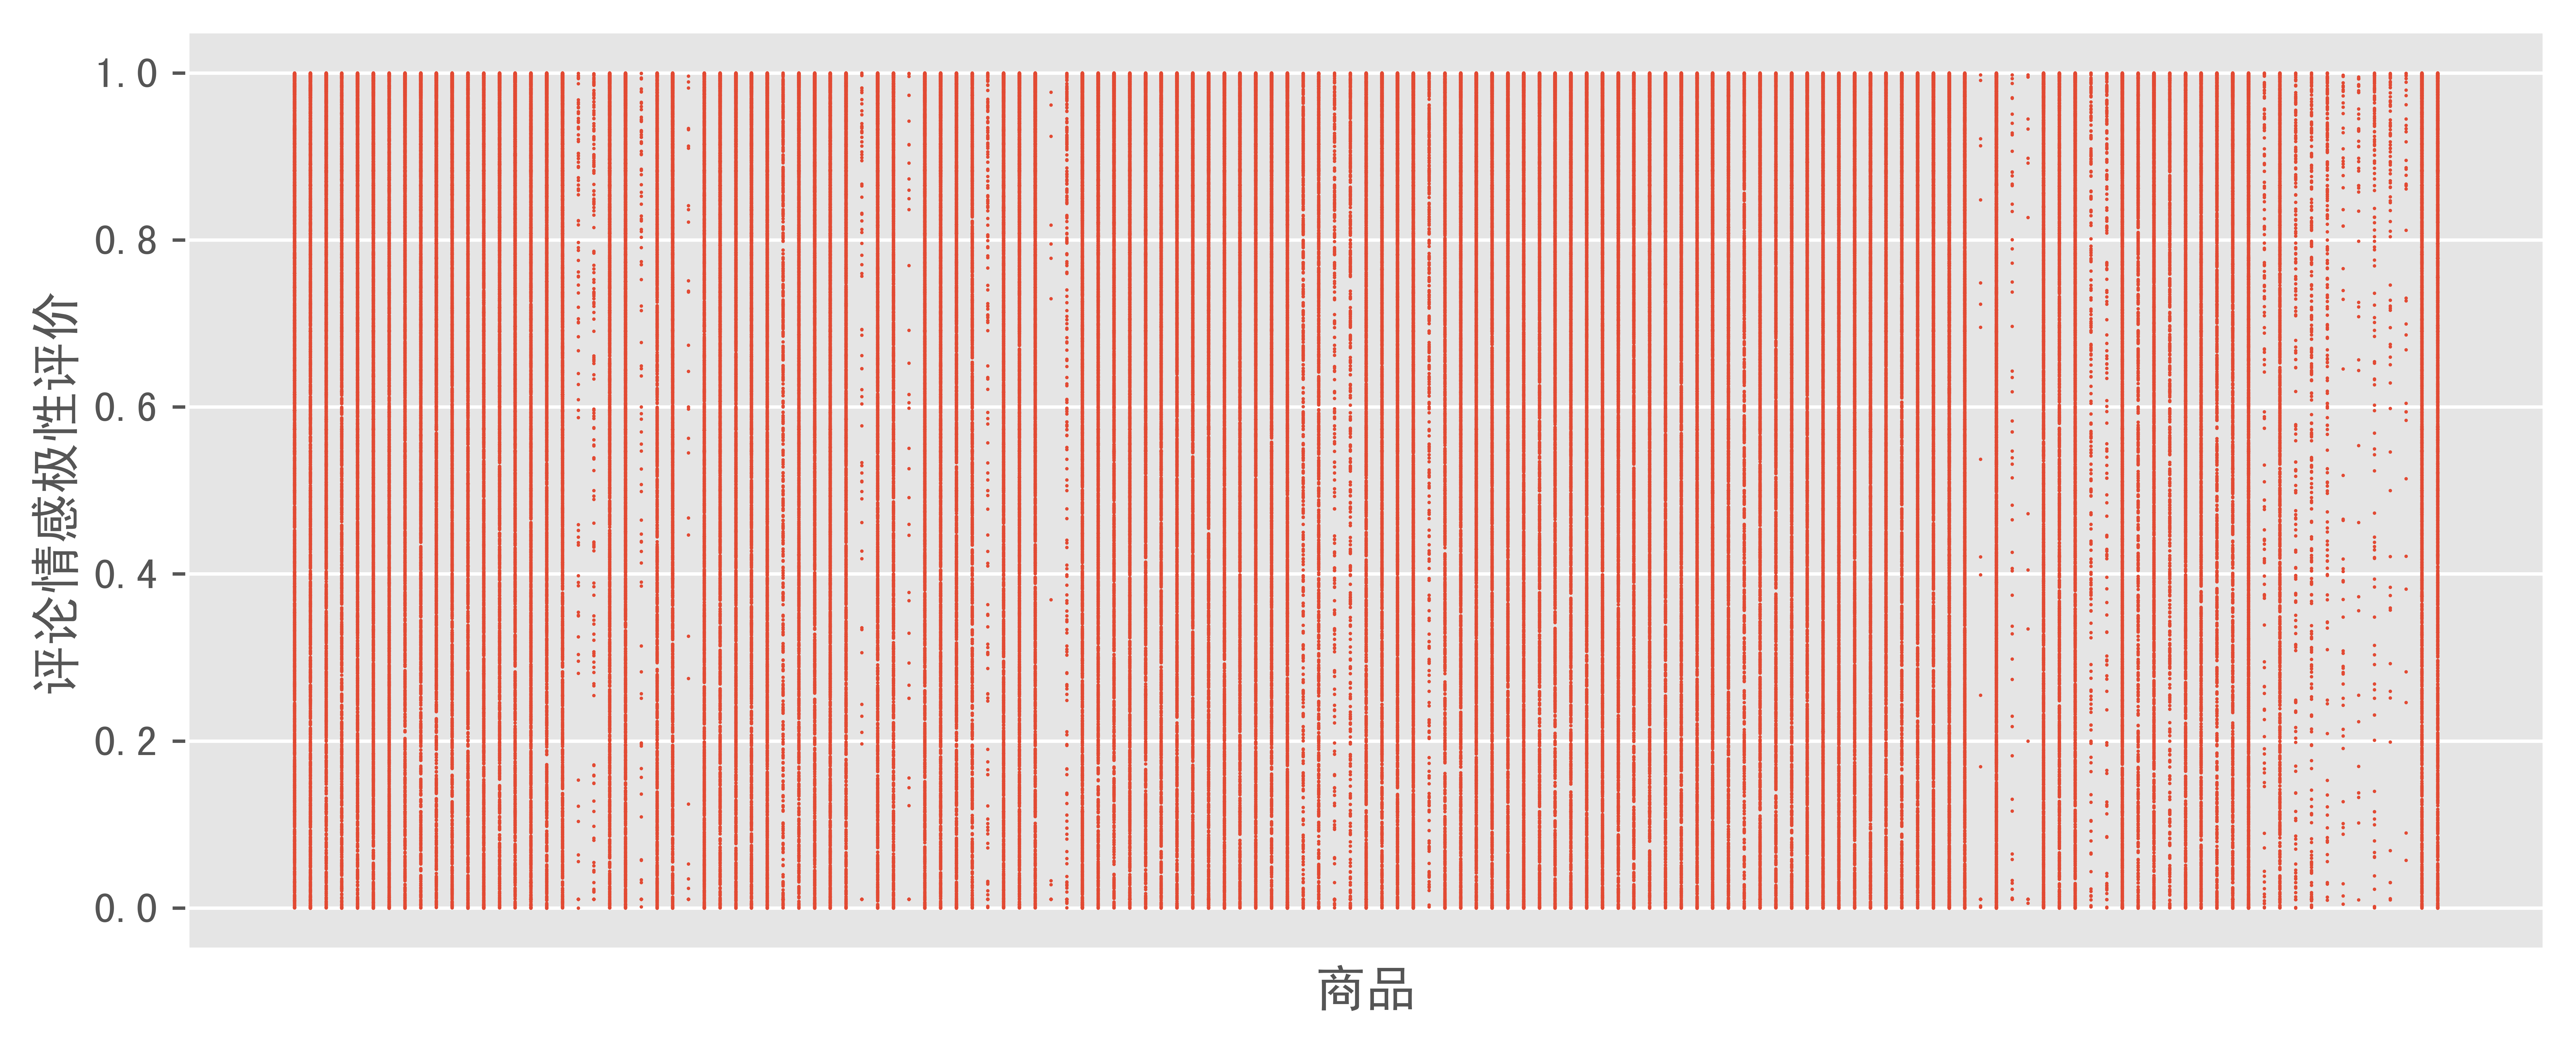

In [118]:
plt.figure(figsize=(10,4),dpi=1000)
plt.style.use('ggplot')

plt.scatter(d3.pid,d3.score,s=0.1)
plt.xticks([])
plt.xlabel('商品')
plt.ylabel('评论情感极性评价')

In [115]:
d3.groupby('pid').count()

,pname,comment,rate,ratertype,len,score
pid,,,,,,
10122453980,4167,4167,4167,4167,4167,4167
13965445160,3010,3010,3010,3010,3010,3010
14757945339,4124,4124,4124,4124,4124,4124
16559083884,2131,2131,2131,2131,2131,2131
16658548459,4231,4231,4231,4231,4231,4231
19975354145,4213,4213,4213,4213,4213,4213
26465596017,3698,3698,3698,3698,3698,3698
35109052504,4078,4078,4078,4078,4078,4078
35279036821,4018,4018,4018,4018,4018,4018


In [44]:
text='"rateDetail":{"paginator":{"items":702,"lastPage":36,"page":1},"rateCount":{"picNum":97,"shop":0,"total":702,"used":71},"rateDanceInfo":{"currentMilles":1526664602014,"intervalMilles":8438344280,"showChooseTopic":false,"storeType":4},"rateList":[{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"t***0","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526651469000,"goldUser":false,"headExtraPic":"","id":1003466446085,"memberIcon":"","pics":"","picsSmall":"","position":"","rateContent":"已收到，很好 好评5分 快递员服务很好","rateDate":"2018-05-18 21:51:09","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":3,"tmallSweetPic":"tmall-grade-t3-18.png","tradeEndTime":1526651280000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:魅海蓝（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"胜***物","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526625741000,"goldUser":true,"headExtraPic":"","id":1003421343637,"memberIcon":"","pics":"","picsSmall":"","position":"","rateContent":"机子很流畅，操作灵敏，拍照效果好。","rateDate":"2018-05-18 14:42:21","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1526568328000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"繁***寞","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526606477000,"goldUser":true,"headExtraPic":"","id":1003377703726,"memberIcon":"","pics":"","picsSmall":"","position":"","rateContent":"正品质量可以","rateDate":"2018-05-18 09:21:17","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525586716000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"孤***吗","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526536544000,"goldUser":false,"headExtraPic":"","id":1003275585842,"memberIcon":"","pics":"","picsSmall":"","position":"","rateContent":"用的非常好，特别帅气","rateDate":"2018-05-17 13:55:44","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1526378072000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"秋***落","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526475684000,"goldUser":false,"headExtraPic":"","id":1003188920338,"memberIcon":"","pics":"","picsSmall":"","position":"","rateContent":"终于到手了，棒棒哒","rateDate":"2018-05-16 21:01:24","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1526475609000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"l***1","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526464539000,"goldUser":true,"headExtraPic":"","id":1003194402929,"memberIcon":"","pics":"","picsSmall":"","position":"920-11-0,5;421-13-32,36;520-11-16,20;420-11-6,10;920-11-37,43;620-12-21,31;","rateContent":"已经用上了，送货很快，昨天拍的，价格不错。机子拿在手里很有质感，屏幕不大，符合我的需求，以前用的P8也差不多大小","rateDate":"2018-05-16 17:55:39","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":3,"tmallSweetPic":"tmall-grade-t3-18.png","tradeEndTime":1526464281000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":true,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:魅海蓝（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"梨***利","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526446469000,"goldUser":false,"headExtraPic":"","id":1003145625708,"memberIcon":"","pics":"","picsSmall":"","position":"920-11-0,6;","rateContent":"看着挺不错的，用用看再说。","rateDate":"2018-05-16 12:54:29","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1526446424000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"没***华","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526435531000,"goldUser":false,"headExtraPic":"","id":1003130638922,"memberIcon":"","pics":"","picsSmall":"","position":"520-12-15,25;","rateContent":"我都不知道怎么评论，你知道吧，我刚下单就降价四五百，你知道我的心情吗???????","rateDate":"2018-05-16 09:52:11","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1526435425000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":true,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:魅海蓝（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"y***0","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526371199000,"goldUser":false,"headExtraPic":"","id":1003050861333,"memberIcon":"","pics":"","picsSmall":"","position":"621-12-6,21;","rateContent":"暂时还满意，但是我爸在某东买的同款有手机膜，我的就没有，不知道为什么","rateDate":"2018-05-15 15:59:59","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1526023713000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":true,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:魅海蓝（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"l***n","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526341891000,"goldUser":false,"headExtraPic":"","id":1002973644430,"memberIcon":"","pics":"","picsSmall":"","position":"10120-11-57,70;920-11-12,16;30221-11-27,30;80221-11-31,41;20420-11-57,70;30221-11-31,41;920-11-42,51;421-11-17,21;920-11-52,56;1321-11-0,4;921-11-22,26;921-11-5,11;","rateContent":"信号强劲 充电速度很快，非常满意 屏幕灵敏，触控流畅 音质好，听音乐看电影都没问题 拍出的照片清晰逼真，颜色也正 售前服务和快递服务都是超赞","rateDate":"2018-05-15 07:51:31","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":1,"tmallSweetPic":"tmall-grade-t1-18.png","tradeEndTime":1526341674000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"泗***唐","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526339921000,"goldUser":false,"headExtraPic":"","id":1002998783178,"memberIcon":"","pics":"","picsSmall":"","position":"921-12-16,24;920-13-50,57;921-12-25,40;","rateContent":"刚用的时候会有卡顿，我都蒙逼了，这可是6G内存啊，现在微信还时不时会突然没有反应。说实话，除了外观，我是有点失望的。","rateDate":"2018-05-15 07:18:41","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525105328000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"t***2","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526218500000,"goldUser":true,"headExtraPic":"","id":1002850863952,"memberIcon":"","pics":"","picsSmall":"","position":"","rateContent":"正品","rateDate":"2018-05-13 21:35:00","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525507595000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":true,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"希***头","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526213035000,"goldUser":false,"headExtraPic":"","id":1002832249688,"memberIcon":"","pics":"","picsSmall":"","position":"920-11-0,2;920-11-13,20;920-11-21,27;","rateContent":"很好！原以为不能扩展内存，后来发现可以了。还是挺满意的。","rateDate":"2018-05-13 20:03:55","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":3,"tmallSweetPic":"tmall-grade-t3-18.png","tradeEndTime":1526212936000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"张***m","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1526033758000,"goldUser":false,"headExtraPic":"","id":1002594127892,"memberIcon":"","pics":["//img.alicdn.com/bao/uploaded/i1/TB2q2uVq_lYBeNjSszcXXbwhFXa_!!0-rate.jpg","//img.alicdn.com/bao/uploaded/i3/TB2ZGgOiyOYBuNjSsD4XXbSkFXa_!!0-rate.jpg","//img.alicdn.com/bao/uploaded/i3/TB2JK4Yq41YBuNjy1zcXXbNcXXa_!!0-rate.jpg"],"picsSmall":"","position":"620-11-29,42;921-13-29,42;20521-11-29,42;30221-13-24,28;121-11-18,23;920-11-100,104;","rateContent":"买给老爸的，就收到当天拿到试了一下，外观很漂亮，音质一般，新机的话耗电量还好不是很快。有点担心的地方就是我只下了几个软件手机就有明显的发烫，不知道打游戏或者是看视频会不会更烫。后续会问问老爸使用感受，暂时好评。","rateDate":"2018-05-11 18:15:58","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525422237000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":true,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"雨***9","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1525957498000,"goldUser":true,"headExtraPic":"","id":1002468464463,"memberIcon":"","pics":"","picsSmall":"","position":"920-11-0,3;1221-12-9,18;920-11-4,8;921-11-19,25;","rateContent":"挺好的，颜值不错，灰色的很好配手机壳，流畅度也不错。","rateDate":"2018-05-10 21:04:58","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525876635000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"拥***裂","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1525937912000,"goldUser":false,"headExtraPic":"","id":1002451106966,"memberIcon":"","pics":"","picsSmall":"","position":"50221-12-17,26;10420-12-55,62;20521-13-9,16;50221-12-27,36;920-11-37,43;121-11-0,8;","rateContent":"手机用起来很舒服，就是耗电有些快，尤其是打游戏的时候，一局游戏耗10个电，其他的还不错，苏宁的物流应该比较快，但是迟迟没发货，等了两天","rateDate":"2018-05-10 15:38:32","reply":"抱歉亲亲，没能及时将商品送到您的手中，还请您原谅，小苏后期会努力改进，提升发货速度，及时将商品配送给您，同时如后续有类似问题发生，您可以第一时间旺旺联系我们帮助您协调，望您继续支持监督小苏。","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525408393000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:魅海蓝（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"泰***y","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1525860977000,"goldUser":false,"headExtraPic":"","id":1002333652658,"memberIcon":"","pics":"","picsSmall":"","position":"","rateContent":"非常好用，棒棒的","rateDate":"2018-05-09 18:16:17","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1524960246000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"傻***娟","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1525820409000,"goldUser":false,"headExtraPic":"","id":1002254164285,"memberIcon":"","pics":"","picsSmall":"","position":"10221-11-6,11;920-11-12,14;620-11-0,5;","rateContent":"手机很畅通，网络也很快，好评。","rateDate":"2018-05-09 07:00:09","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525557749000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":true,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:魅海蓝（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"瓶***爱","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1525769616000,"goldUser":false,"headExtraPic":"","id":1002202768340,"memberIcon":"","pics":"","picsSmall":"","position":"921-13-18,25;10120-11-26,32;620-11-0,8;","rateContent":"手机确实挺好用的，希望能够永久一点。也不是运行很快。服务态度挺好","rateDate":"2018-05-08 16:53:36","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1524960686000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""},{"aliMallSeller":false,"anony":false,"appendComment":"","attributes":"","attributesMap":"","aucNumId":"","auctionPicUrl":"","auctionPrice":"","auctionSku":"网络类型:4G全网通;机身颜色:海鸥灰（6GB）;套餐类型:官方标配;存储容量:64GB","auctionTitle":"","buyCount":0,"carServiceLocation":"","cmsSource":"天猫","displayRatePic":"","displayRateSum":0,"displayUserLink":"","displayUserNick":"h***m","displayUserNumId":"","displayUserRateLink":"","dsr":0.0,"fromMall":true,"fromMemory":0,"gmtCreateTime":1525746526000,"goldUser":false,"headExtraPic":"","id":1002167474382,"memberIcon":"","pics":"","picsSmall":"","position":"920-11-19,25;921-11-9,18;920-11-26,30;121-11-0,8;","rateContent":"手机外形时尚大方，目前使用几天很流畅，一直是荣耀粉，强烈支持！?","rateDate":"2018-05-08 10:28:46","reply":"","sellerId":2616970884,"serviceRateContent":"","structuredRateList":[],"tamllSweetLevel":0,"tmallSweetPic":"","tradeEndTime":1525746381000,"tradeId":"","useful":true,"userIdEncryption":"","userInfo":"","userVipLevel":0,"userVipPic":""}],"searchinfo":"","tags":""}'
json.loads(text.strip().strip('()'))

JSONDecodeError: Extra data: line 1 column 13 (char 12)